### Evaluating train, validation and test accuracy for DT

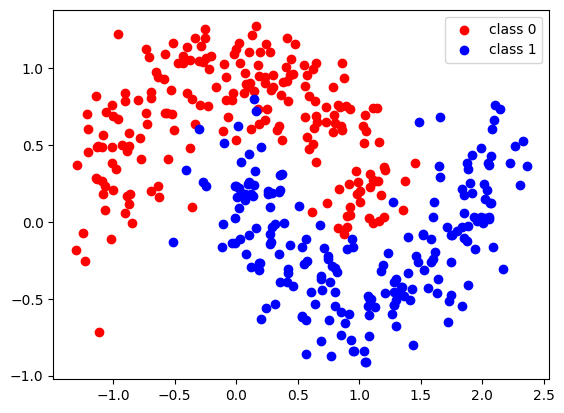

In [1]:
from sklearn.datasets import make_moons
from matplotlib import pyplot as plt

X,y = make_moons(n_samples=400, noise=0.2, random_state=42)
plt.scatter(X[y==0,0], X[y==0,1], c="red")
plt.scatter(X[y==1,0], X[y==1,1], c="blue")
plt.legend(["class 0", "class 1"])

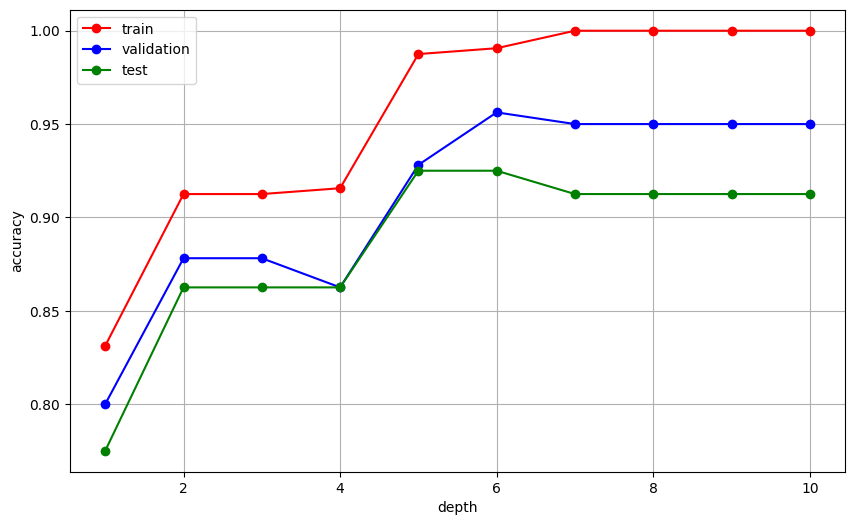

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, shuffle=True, random_state=42)

depths = np.arange(1, 11)
train_accs = []
validation_accs = []
test_accs = []
for depth in depths:
    tree_model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree_model.fit(X_train, y_train)
    yhat = tree_model.predict(X_train)
    train_accs.append(accuracy_score(y_train, yhat))
    validation_accs.append(np.mean(cross_val_score(tree_model, X_train, y_train,)))
    yhat = tree_model.predict(X_test)
    test_accs.append(accuracy_score(y_test, yhat))

plt.figure(figsize=(10, 6))
plt.plot(depths, train_accs, 'r', marker="o")
plt.plot(depths, validation_accs, 'b', marker="o")
plt.plot(depths, test_accs, 'g', marker= "o")
plt.legend(["train", "validation", "test"])
plt.xlabel("depth")
plt.ylabel("accuracy")
plt.grid()

### Finding best hyperparameters

In [3]:
from sklearn.model_selection import GridSearchCV

tree_model = DecisionTreeClassifier(random_state=42)
param_grid = {'max_depth': np.arange(1,11)}
grid_search = GridSearchCV(tree_model, param_grid, cv=3)
grid_search.fit(X_train,y_train)

best_depth = grid_search.best_params_['max_depth']
best_validation_acc = grid_search.best_score_

print(f"Best depth: {best_depth}")
print(f"Best cross-validation score: {best_validation_acc}")

final_tree_model = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
final_tree_model.fit(X_train, y_train)



Best depth: 6
Best cross-validation score: 0.9593840004702286


DecisionTreeClassifier(max_depth=6, random_state=42)